# Data Visualization

 This notebook aims to reveal meaningful insights by applying various visualization and feature engineering techniques on the Toxic Comments Challenge dataset. 
 
** Visualizations/Analysis : 
** 
 1. Categorical spread of overall data
 2. Categorical spread of toxic data
 3. Feature Importance
 4. Adversarial Validation

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

#Dataset
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

In [2]:
# Basic Tabular description of the Training dataset used here
train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#Inserting a num_words column into dataframe

train_df["num_words"] = train_df["comment_text"].apply(lambda x:len(str(x).split()))
test_df["num_words"] = test_df["comment_text"].apply(lambda x:len(str(x).split()))

train_df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_words
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805,67.273527
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420,99.230702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1411.000000


In [4]:
#Checking on the first few rows of the dataframe
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,num_words
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,43
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,17
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,42
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,113
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,13


## Distribution of data 

We explore the way in which data is distributed across the several categories in the dataset.

* Firstly, we accumulate all comments marked under any of the toxic categories and compare the difference from non-toxic comments
* Secondly, we explore how the toxic comments are distributed across the various categories of toxicity
* Thirdly, we explore the overlap across the various categories of toxicity
* Finally, we check the length of the various comments in the dataset

## Overall Cateogorization

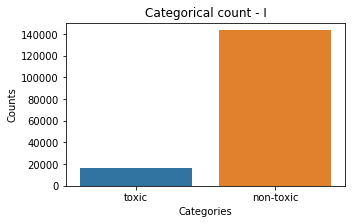

In [5]:
#Code block to visualize the number of total toxic comments of any category and non-toxic comments
train_df["toxicity_score"] = train_df.iloc[:,2:-2].sum(axis=1)
types = ["toxic", "non-toxic"]
toxic_count = len(train_df[train_df["toxicity_score"]>0])
nontoxic_count = train_df.shape[0]-toxic_count
comments_count = [toxic_count, nontoxic_count]

plt.figure(figsize=(5,3))
ax = sns.barplot(types, comments_count)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Categorical count - I')
plt.show()

## Toxicity Categorization

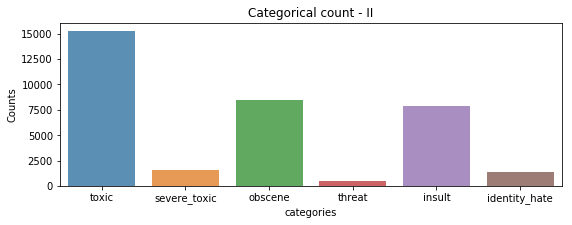

In [6]:
#Code block to visualize the populations of the different categories of toxicity

counts = train_df.iloc[:,2:-2].sum(axis=0)
counts_values = counts.values
categories = counts.index.values

plt.figure(figsize=(9,3))
ax = sns.barplot(categories, counts_values, alpha = 0.8)
plt.xlabel('categories')
plt.ylabel('Counts')
plt.title('Categorical count - II')
plt.show()

## Analyzing overalp across Toxic classes

We use Venn diagrams to find out the degree of overlap across toxic classes

In [7]:
# Toxic-Insult-Obscene Set 
toxic = train_df[(train_df['toxic'] == 1) & (train_df['insult'] == 0) & (train_df['obscene'] == 0)].shape[0]
insult = train_df[(train_df['toxic'] == 0) & (train_df['insult'] == 1) & (train_df['obscene'] == 0)].shape[0]
obscene = train_df[(train_df['toxic'] == 0) & (train_df['insult'] == 0) & (train_df['obscene'] == 1)].shape[0]
toxic_insult = train_df[(train_df['toxic'] == 1) & (train_df['insult'] == 1) & (train_df['obscene'] == 0)].shape[0]
toxic_obscene = train_df[(train_df['toxic'] == 1) & (train_df['insult'] == 0) & (train_df['obscene'] == 1)].shape[0]
insult_obscene = train_df[(train_df['toxic'] == 0) & (train_df['insult'] == 1) & (train_df['obscene'] == 1)].shape[0]
toxic_insult_obscene = train_df[(train_df['toxic'] == 1) & (train_df['insult'] == 1) & (train_df['obscene'] == 1)].shape[0]

#Threat-Insult-Obscene Set
threat = train_df[(train_df['threat'] == 1) & (train_df['insult'] == 0) & (train_df['obscene'] == 0)].shape[0]
insult = train_df[(train_df['threat'] == 0) & (train_df['insult'] == 1) & (train_df['obscene'] == 0)].shape[0]
obscene = train_df[(train_df['threat'] == 0) & (train_df['insult'] == 0) & (train_df['obscene'] == 1)].shape[0]
threat_insult = train_df[(train_df['threat'] == 1) & (train_df['insult'] == 1) & (train_df['obscene'] == 0)].shape[0]
threat_obscene = train_df[(train_df['threat'] == 1) & (train_df['insult'] == 0) & (train_df['obscene'] == 1)].shape[0]
insult_obscene = train_df[(train_df['threat'] == 0) & (train_df['insult'] == 1) & (train_df['obscene'] == 1)].shape[0]
threat_insult_obscene = train_df[(train_df['threat'] == 1) & (train_df['insult'] == 1) & (train_df['obscene'] == 1)].shape[0]

#Toxic-Severe Toxic Set
t = train_df[(train_df['toxic'] == 1) & (train_df['severe_toxic'] == 0)].shape[0]
s = train_df[(train_df['toxic'] == 0) & (train_df['severe_toxic'] == 1)].shape[0]
t_s = train_df[(train_df['toxic'] == 1) & (train_df['severe_toxic'] == 1)].shape[0]

#Toxic-Hate Set
t1 = train_df[(train_df['toxic'] == 1) & (train_df['identity_hate'] == 0)].shape[0]
h = train_df[(train_df['toxic'] == 0) & (train_df['identity_hate'] == 1)].shape[0]
t1_h = train_df[(train_df['toxic'] == 1) & (train_df['identity_hate'] == 1)].shape[0]

/opt/conda/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


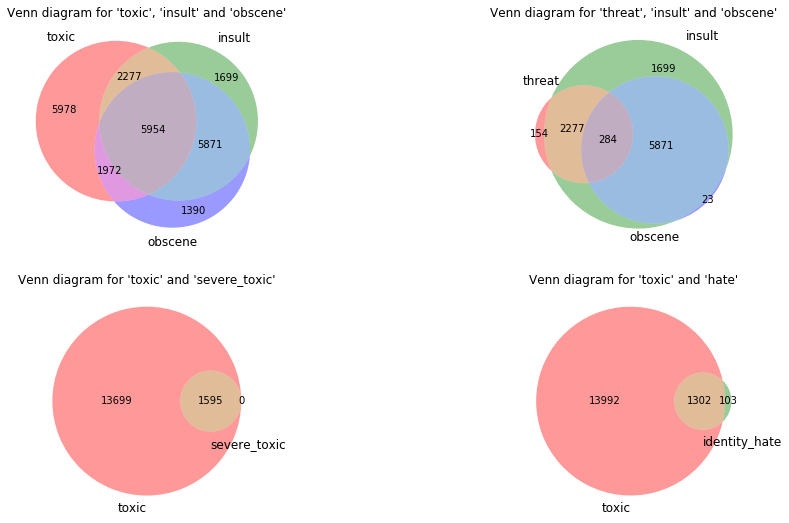

In [8]:
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import matplotlib.gridspec as gridspec 

plt.figure(figsize=(16,9))

plt.subplot(221)
plt.title("Venn diagram for 'toxic', 'insult' and 'obscene'")
venn3(subsets = (toxic, insult, obscene, toxic_insult, toxic_obscene, insult_obscene,toxic_insult_obscene), 
      set_labels=('toxic', 'insult', 'obscene'))

plt.subplot(222)
plt.title("Venn diagram for 'threat', 'insult' and 'obscene'")
venn3(subsets = (threat, insult, obscene, threat_insult, threat_obscene, insult_obscene,threat_insult_obscene), 
      set_labels=('threat', 'insult', 'obscene'))

plt.subplot(223)
plt.title("Venn diagram for 'toxic' and 'severe_toxic'")
venn2(subsets = (t, s, t_s), 
      set_labels=('toxic', 'severe_toxic'))

plt.subplot(224)
plt.title("Venn diagram for 'toxic' and 'hate'")
venn2(subsets = (t1, h, t1_h), 
      set_labels=('toxic', 'identity_hate'))

plt.show()

**The following observations can be made**

* There is a huge overlap across almost all toxic categories
* Category Toxic seems to be encompassing almost all categories
* For categories like identity_hate and severe_toxic, the toxic class almost entirely contains them
* This makes it a difficult classification challenge and has to be surely dealt in a better way if nonlinear models are used.

## Length Distribution of Comments

The lengths of the various comments are plotted as a histogram
We notice that almost all comments are of length less than 100

In [9]:
lengths = []
for j in range(train_df.shape[0]):
    lengths.append(len(train_df['comment_text'][j].split()))
    
np.mean(lengths), np.std(lengths), np.median(lengths)

(67.27352714465661, 99.23039126279367, 36.0)

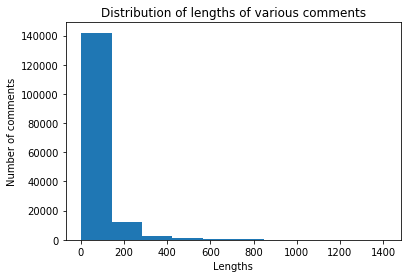

In [10]:
plt.hist(lengths)
plt.title("Distribution of lengths of various comments")
plt.xlabel("Lengths")
plt.ylabel("Number of comments")
plt.show()



## Cleaning

Data Cleaning becomes an important aspect of any Classification Task
* To remove any unwanted features that have almost no signifcance in the classification task
* To structure each data point in a proper fashion


In [11]:
import re, string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()

eng_stopwords = set(stopwords.words("english"))

#Creatin 
merge = pd.concat([train_df, test_df])
corpus = merge['comment_text']
def clean(text):
    text = text.lower()
    text = re.sub("\\n","",text) #Removes newlines
    text=re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}","",text) #Removes IP addresses
    text=re.sub("\[\[.*\]","",text) #Removes usernames
    words=tokenizer.tokenize(text) #Tokenization
    words = [w for w in words if not w in eng_stopwords]
    clean_text = " ".join(words)
    return(clean_text)

clean_corpus=corpus.apply(lambda x:clean(x)) #Clean corpus of data for both training and testing combined

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


## Feature Visualization - TFIDF

Analysis motivation: https://buhrmann.github.io/tfidf-analysis.html

* TF IDF is a statistical measure used to evaluate how a important a word is to a document in a corpus
* Importance increases with frequence(TF term) but decreases with the occurence of the word in the corpus(IDF)
* We analyse the unigrams case here
* Each of Train and test unigrams files is basically a (No. of comments)x(No. of features) sized sparse matrix


**Aim:** To find the most important features for each of the categories and plot them.

In [22]:
tf_idf = TfidfVectorizer(min_df = 20, max_features = 100000,
                         analyzer = 'word', ngram_range=(1,1), 
                         use_idf=1,smooth_idf=1,sublinear_tf=1,
                        stop_words = 'english', strip_accents = 'unicode')
tfidf_fit = tf_idf.fit(clean_corpus)
features = np.array(tfidf_fit.get_feature_names()) #Get all the features/words that have a corresponding TF-IDF score
#Training set unigrams TFIDF Matrix
train_unigrams =  tfidf_fit.transform(clean_corpus.iloc[:train_df.shape[0]])
#Testing set unigrams Matrix
test_unigrams = tfidf_fit.transform(clean_corpus.iloc[train_df.shape[0]:])

In [32]:
#One can judge the sparsity by checking this sum of all the tf-idf weightings of a comment
np.sum(train_unigrams[0].toarray())

4.141384918957334

In [27]:
#Top n tf-idf values in a row of the unigrams matrix
def top_tfidf_features(row, features, top_n = 10):
    # Get indices of the highest top_n features in a row 
    topn_ids = np.argsort(row)[::-1][:top_n] 
    #Get the corresponding feature names
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats) 
    df.columns = ['feature', 'tfidf']
    return df

#Top tfidf features in specific comment(matrix row)
def top_feats_in_comment(Xtr, features, row_id, top_n=10):
    #Squeeze the sparse row
    row = np.squeeze(Xtr[row_id].toarray())
    #Return top n tf-idf values for this specific row as a dataframe
    return top_tfidf_features(row, features, top_n)

#Top n features that are most important across comments in rows 
def top_mean_features(Xtr, features, grp_ids, min_tfidf=0.1, top_n=10):
    D = Xtr[grp_ids].toarray() #Get an array out of the unigrams
    D[D < min_tfidf] = 0 #Threshold for minimum tf-idf score, otherwise set to 0
    tfidf_means = np.mean(D, axis=0) #Mean of all tf-idf values
    return top_tfidf_features(tfidf_means, features, top_n) 

#List of dataframes that holds top n features and the tfidf value calculated across documents/comments of the same label.
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=10):
    dfs = []
    cols=train_tags.columns
    
    #For each of the category find the mean tf_idf weights across the associated comments
    for col in cols:
        ids = train_tags.index[train_tags[col]==1]
        feats_df = top_mean_features(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        #feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [33]:
train_tags = train_df.iloc[:,2:-2] #All the scores for different categories
tfidf_top_n_per_class = top_feats_by_class(train_unigrams, features) 

In [15]:
#List top tf-idf features for the nth comment in the training set
top_tfidf_features(np.squeeze(train_unigrams[54].toarray()),features,20)

,feature,tfidf
0,disregard,0.568049
1,awesome,0.512942
2,notice,0.368419
3,simply,0.339507
4,ll,0.308600
5,thanks,0.260728
6,exercising,0.000000
7,exemplified,0.000000
8,exemplifies,0.000000
9,exempt,0.000000


## Visualizing top tf-idf features for each category

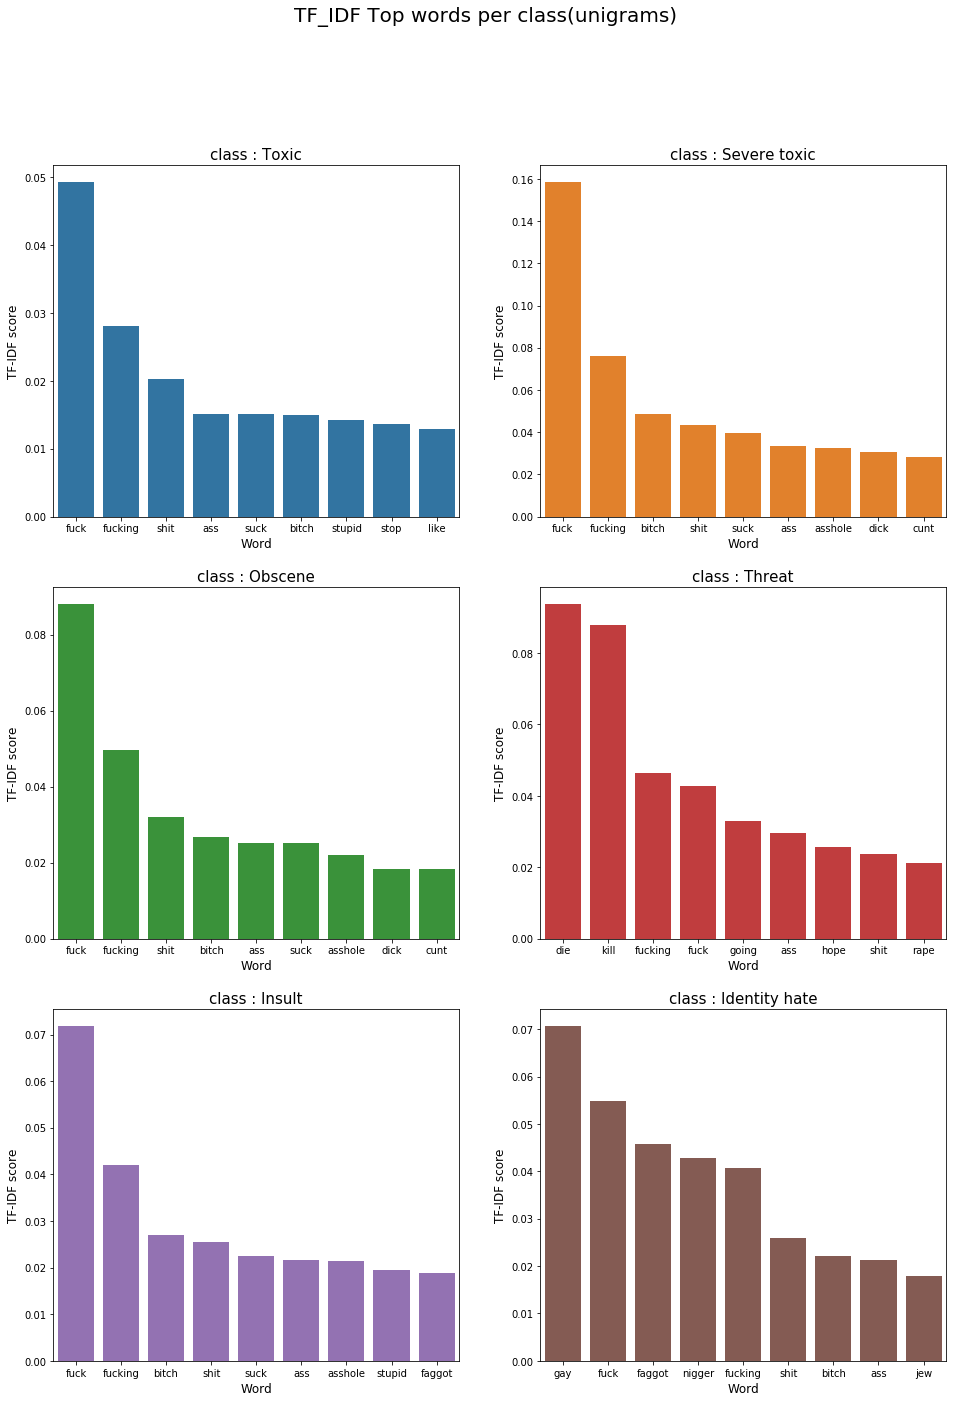

In [16]:
plt.figure(figsize=(16,22))
plt.suptitle("TF_IDF Top words per class(unigrams)",fontsize=20)
color = sns.color_palette()

gridspec.GridSpec(3,2)
plt.subplot2grid((3,2),(0,0))
sns.barplot(tfidf_top_n_per_class[0].feature.iloc[0:9],tfidf_top_n_per_class[0].tfidf.iloc[0:9],color=color[0])
plt.title("class : Toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)

plt.subplot2grid((3,2),(0,1))
sns.barplot(tfidf_top_n_per_class[1].feature.iloc[0:9],tfidf_top_n_per_class[1].tfidf.iloc[0:9],color=color[1])
plt.title("class : Severe toxic",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((3,2),(1,0))
sns.barplot(tfidf_top_n_per_class[2].feature.iloc[0:9],tfidf_top_n_per_class[2].tfidf.iloc[0:9],color=color[2])
plt.title("class : Obscene",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((3,2),(1,1))
sns.barplot(tfidf_top_n_per_class[3].feature.iloc[0:9],tfidf_top_n_per_class[3].tfidf.iloc[0:9],color=color[3])
plt.title("class : Threat",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((3,2),(2,0))
sns.barplot(tfidf_top_n_per_class[4].feature.iloc[0:9],tfidf_top_n_per_class[4].tfidf.iloc[0:9],color=color[4])
plt.title("class : Insult",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.subplot2grid((3,2),(2,1))
sns.barplot(tfidf_top_n_per_class[5].feature.iloc[0:9],tfidf_top_n_per_class[5].tfidf.iloc[0:9],color=color[5])
plt.title("class : Identity hate",fontsize=15)
plt.xlabel('Word', fontsize=12)
plt.ylabel('TF-IDF score', fontsize=12)


plt.show()

## Adversarial Validation

Another important aspect to consider before developing a feature based classification model is to develop a sound understanding of how different the training and testing sets are. 

If data in both training and testing come from similar distributions, the development of a validation set can be sound and a validation accuracy/loss metric can be used to judge the classifier.

We will be predicting if an individual comment is from the training set or the testing set. 

In [34]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

#Assigning Value 1 to Training Set and 0 to Testing Set
train['is_train']=1
test['is_train']=0
merge = pd.concat([train, test])
merge.drop(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'id'], axis=1, inplace=True)
merge.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,comment_text,is_train
0,Explanation\nWhy the edits made under my usern...,1
1,D'aww! He matches this background colour I'm s...,1
2,"Hey man, I'm really not trying to edit war. It...",1
3,"""\nMore\nI can't make any real suggestions on ...",1
4,"You, sir, are my hero. Any chance you remember...",1


In [35]:
X_train, X_test, y_train, y_valid = train_test_split(merge, merge['is_train'], test_size=0.2, random_state=14) 
print(X_train.shape)
print(X_test.shape)

(250188, 2)
(62547, 2)


In [ ]:
#Calculate tf idf features
tfidf_vec = TfidfVectorizer(ngram_range=(1,4), #4-gram
                            analyzer = 'word', 
                            stop_words=None,
                            max_features = 20000,
                            binary=True)
train_tfidf = tfidf_vec.fit_transform(X_train['comment_text'])
test_tfidf = tfidf_vec.transform(X_test['comment_text'])
print(train_tfidf.shape)
print(test_tfidf.shape)

In [20]:
model = LogisticRegression(solver='newton-cg') #Simple classification
model.fit(train_tfidf, y_train)
pred_test_y = model.predict_proba(test_tfidf)[:, 1]
print('AUC of guessing test: {}'.format(roc_auc_score(y_valid, pred_test_y)))  

AUC of guessing test: 0.6815982623002828


## Weights on Features

So, we see that the classification across training and testing set data is quite weak and therefore, we can rely on validation accuracy and loss metrics to judge our model

Moreover, we can estimate the weightings on the various features by using the eli5 library

In [21]:
import eli5

X_test['pred'] = pred_test_y
X_test.head()

eli5.show_weights(model, vec = tfidf_vec, top=30)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Weight?,Feature
+13.140,talk
+9.170,2004 utc
+6.808,2005 utc
+6.550,talk contribs
+5.729,thanks talk
+5.311,contribs
+5.242,76
+4.998,86
+4.937,thank you talk
+4.747,71
